Part 2: Machine Learning

# What factors influence number of impressions for Facebook Ads
###Tyler Starr
##Project Overview and Outline:

--> Problem statement and hypothesis

--> Description of your data set and how it was obtained

--> Description of any pre-processing / data-munging steps

--> What you learned from exploring the data, including visualizations

--> How you chose which features to use in your analysis

--> Details of your modeling process, including how you selected your models and validated them

--> Your challenges and successes

--> Possible extensions or business applications of your project

--> Conclusions and key learnings

In [1]:
print "Let's do some machine learning!"

Let's do some machine learning!


#Problem Statement
###What happens when you start maxing out Impressions?


Depending on the number of audiences per ad account, with a large media spend, the number of impressions per day can become a crucial factor.

Diversifying the number of target audiences is a good way of increasing sure number of impressions; however there comes a point when you've maximized diverse successful audiences.

When that is the case, it is good to know how many impressions per day an adset (the ad unit responsiblity for target information) will receive per day. 

##What factors into the number of impressions per day?

While budget and audience size may be good indicators of initial impressions for day, how other factors contribute to the number of impressions is vastly important in guiding the strategy behind running a facebook campaign.

As such, my project is aimed on creating a model that best predicts an adset's daily number of impressions based on historic factors (i.e. factors that you would have the metrics for before the adset runs). 


# --> Description of your data set and how it was obtained 
####What is my data?

My data comes directly from the facebook ads manager platform. There are many different fields you can choose from when pulling reports: conversion data, number of impressions, what platform the adset was shown on, regional data, and so on. I focused on pulling data surrounding budget, bid, adset start date, and impression data. A lot of other important information I could decipher from the name of the adset.

####Obtaining the data
As I mentioned, I pulled the data from the facebook ads manager platform. It was as easy as setting some initial parameters and clicking a button which was really nice.

# --> Description of any pre-processing / data-munging steps

To get the historic data, I had to run some for-loop heavy functions that looked at the adset ID (unique identifer) and its previous data. This was a "Processing Heavy" step.

I also wanted to get the day of the week and day of the year, as seasonality and weekday were factors in overall conversion data.


In [118]:
#Import Pandas, Numpy, Stats Models, Patsy, Seaboard, and some SKLearn models
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [119]:
#Import cleaned data
#df_raw = pd.read_csv('.../DS_BOS_07_Students/TylerStarr/CPM Project/Cleaned_data_12.25.15.csv')

In [2]:
#df_raw.head()

In [121]:
df_raw.shape

(31751, 48)

In [3]:
#Look at columns of DF

##What columns do you want to keep?
Budget
Bid Type - All columns
Day of Year
Day of Week
Placement Type - All columns
Ad Set Age
Historic Reach
Historic Imporessions
Historic Spend


In [123]:
#give df1 only the columns we want
df1 = df_raw.iloc[:, 23:]
df1['Budget'] = df_raw['Budget']
df1['Impressions'] = df_raw['Impressions']

In [5]:
#Look at initial correlations:
#df1.corr()

In [1]:
print len(df1.columns)
print df1.columns

#Cols to Keep 1: Day of Year, Day of Week, CPM, Bid Type Columns
columns_to_keep_1 = df1.columns[:6]

#print columns_to_keep_1
#print type(columns_to_keep_1)

#Cols to Keep 2: Ad Set Age, Historic Reach, Historic impressions, Budget, Impressions
columns_to_keep_2 = df1.columns[-6:]
print columns_to_keep_2

NameError: name 'df1' is not defined

In [4]:
#give df_no_placement dataframe correct data
df_no_placement = df1[columns_to_keep_1]
df_no_placement.head(10)
df_no_placement[columns_to_keep_2] = df1[columns_to_keep_2]
#df_no_placement.head()

NameError: name 'df1' is not defined

In [130]:
df_no_placement.corr()

,Day of Year,Day of Week,CPM,Bid Type: _ABSOLUTE_OCPM,Bid Type: _CPA,Bid Type: _CPC,Ad Set Age,Historic Reach,Historic Impressions,Historic Spend,Budget,Impressions
Day of Year,1.000000,-0.006660,-0.138533,-0.353175,0.081191,0.207104,0.384474,0.927299,0.926525,0.932527,0.057354,-0.052452
Day of Week,-0.006660,1.000000,0.082691,0.001456,0.000711,-0.000628,-0.017408,-0.012802,-0.012887,-0.012715,0.007959,-0.015977
CPM,-0.138533,0.082691,1.000000,0.255708,-0.035725,-0.045463,-0.150840,-0.087671,-0.082805,-0.096317,0.058477,0.009265
Bid Type: _ABSOLUTE_OCPM,-0.353175,0.001456,0.255708,1.000000,-0.161435,-0.659867,0.251973,-0.399102,-0.400785,-0.393484,0.094522,0.112442
Bid Type: _CPA,0.081191,0.000711,-0.035725,-0.161435,1.000000,-0.014210,-0.025237,0.080067,0.080992,0.079070,-0.015589,-0.029150
Bid Type: _CPC,0.207104,-0.000628,-0.045463,-0.659867,-0.014210,1.000000,-0.182688,0.242060,0.242865,0.237953,-0.061233,-0.102671
Ad Set Age,0.384474,-0.017408,-0.150840,0.251973,-0.025237,-0.182688,1.000000,0.288493,0.284572,0.300603,-0.029226,0.014973
Historic Reach,0.927299,-0.012802,-0.087671,-0.399102,0.080067,0.242060,0.288493,1.000000,0.999946,0.999737,0.059168,-0.111745
Historic Impressions,0.926525,-0.012887,-0.082805,-0.400785,0.080992,0.242865,0.284572,0.999946,1.000000,0.999507,0.058853,-0.111691
Historic Spend,0.932527,-0.012715,-0.096317,-0.393484,0.079070,0.237953,0.300603,0.999737,0.999507,1.000000,0.058653,-0.112837


#Visualizations

##Imp by Day of Week

Imp_by_Day_of_Week.png


/Users/waynestock2000/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


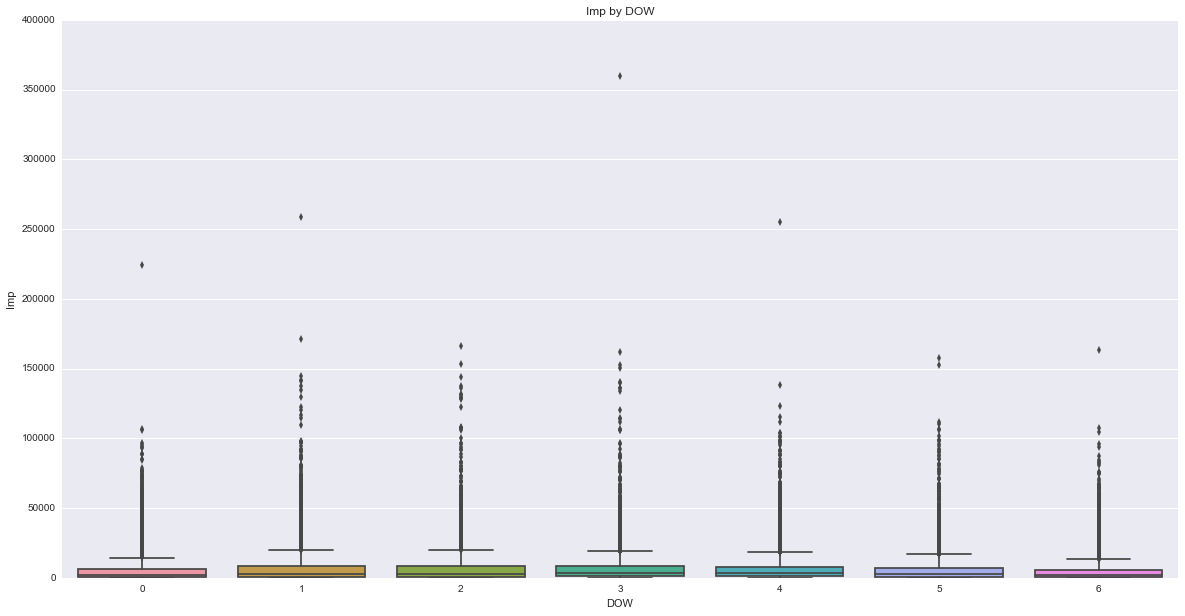

In [131]:
# Day of week
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Imp by DOW')
# Create a seaborn boxplot of counts by month ordered by increasing month
sns.boxplot(x=df_no_placement["Day of Week"].order(), y=df_no_placement['Impressions'])
ax.set_xlabel('DOW')
ax.set_ylabel('Imp')

fig_name = "Imp_by_Day_of_Week"+'.png'
print fig_name
fig.savefig(fig_name)

##Imp by Day of Year

Imp_by_Day_of_Year.png


/Users/waynestock2000/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


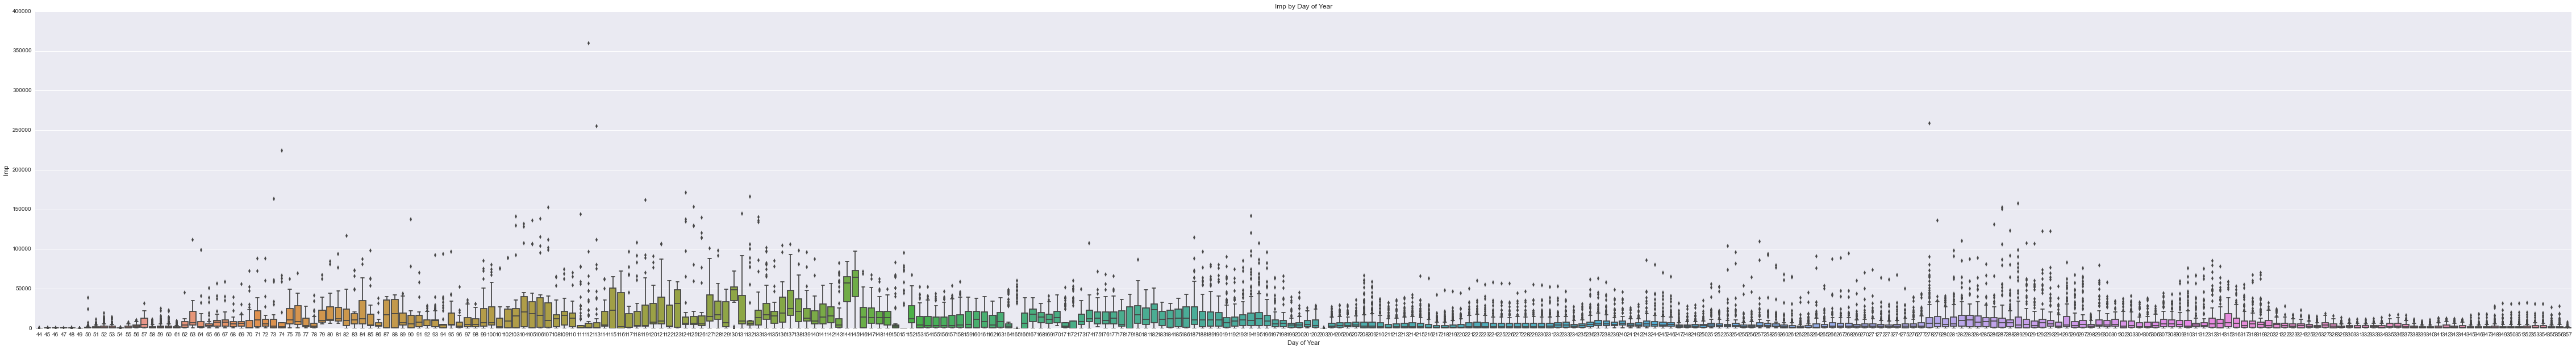

In [132]:
# Day of Year
fig, ax = plt.subplots(1,1, figsize=(80,10))
ax.set_title('Imp by Day of Year')
# Create a seaborn boxplot of counts by month ordered by increasing month
sns.boxplot(x=df_no_placement["Day of Year"].order(), y=df_no_placement['Impressions'])
ax.set_xlabel('Day of Year')
ax.set_ylabel('Imp')

fig_name = "Imp_by_Day_of_Year"+'.png'
print fig_name
fig.savefig(fig_name)

##Imp by Budget

/Users/waynestock2000/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


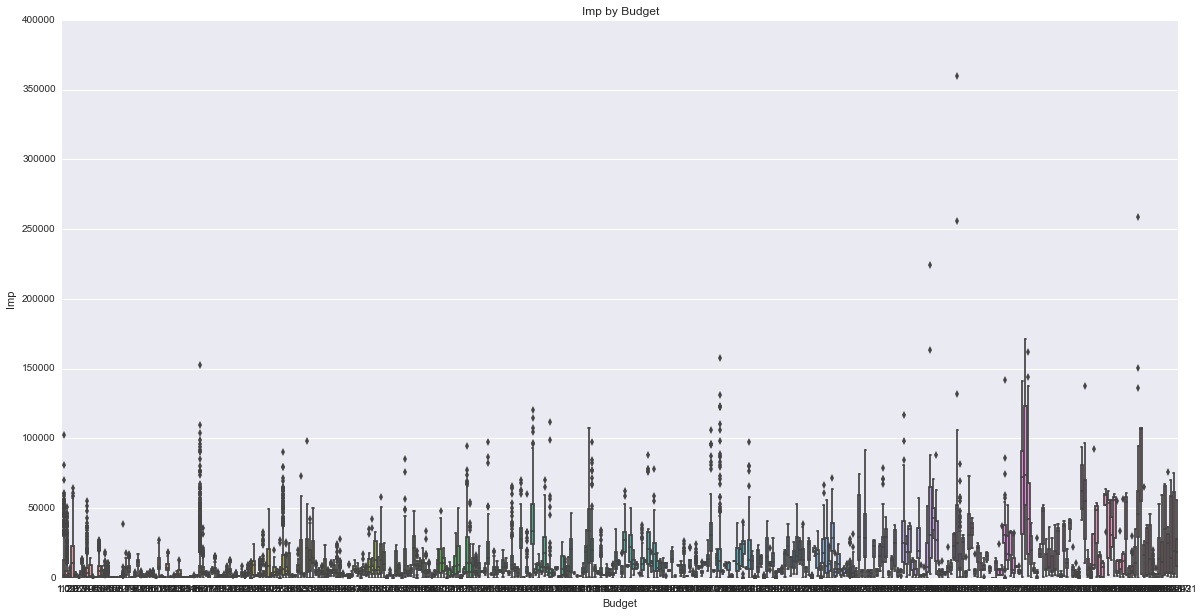

In [133]:
# Budget
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Imp by Budget')
# Create a seaborn boxplot of counts by month ordered by increasing month
sns.boxplot(x=df_no_placement["Budget"].order(), y=df_no_placement['Impressions'])
ax.set_xlabel('Budget')
ax.set_ylabel('Imp')

Imp_by_Budget.png


/Users/waynestock2000/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


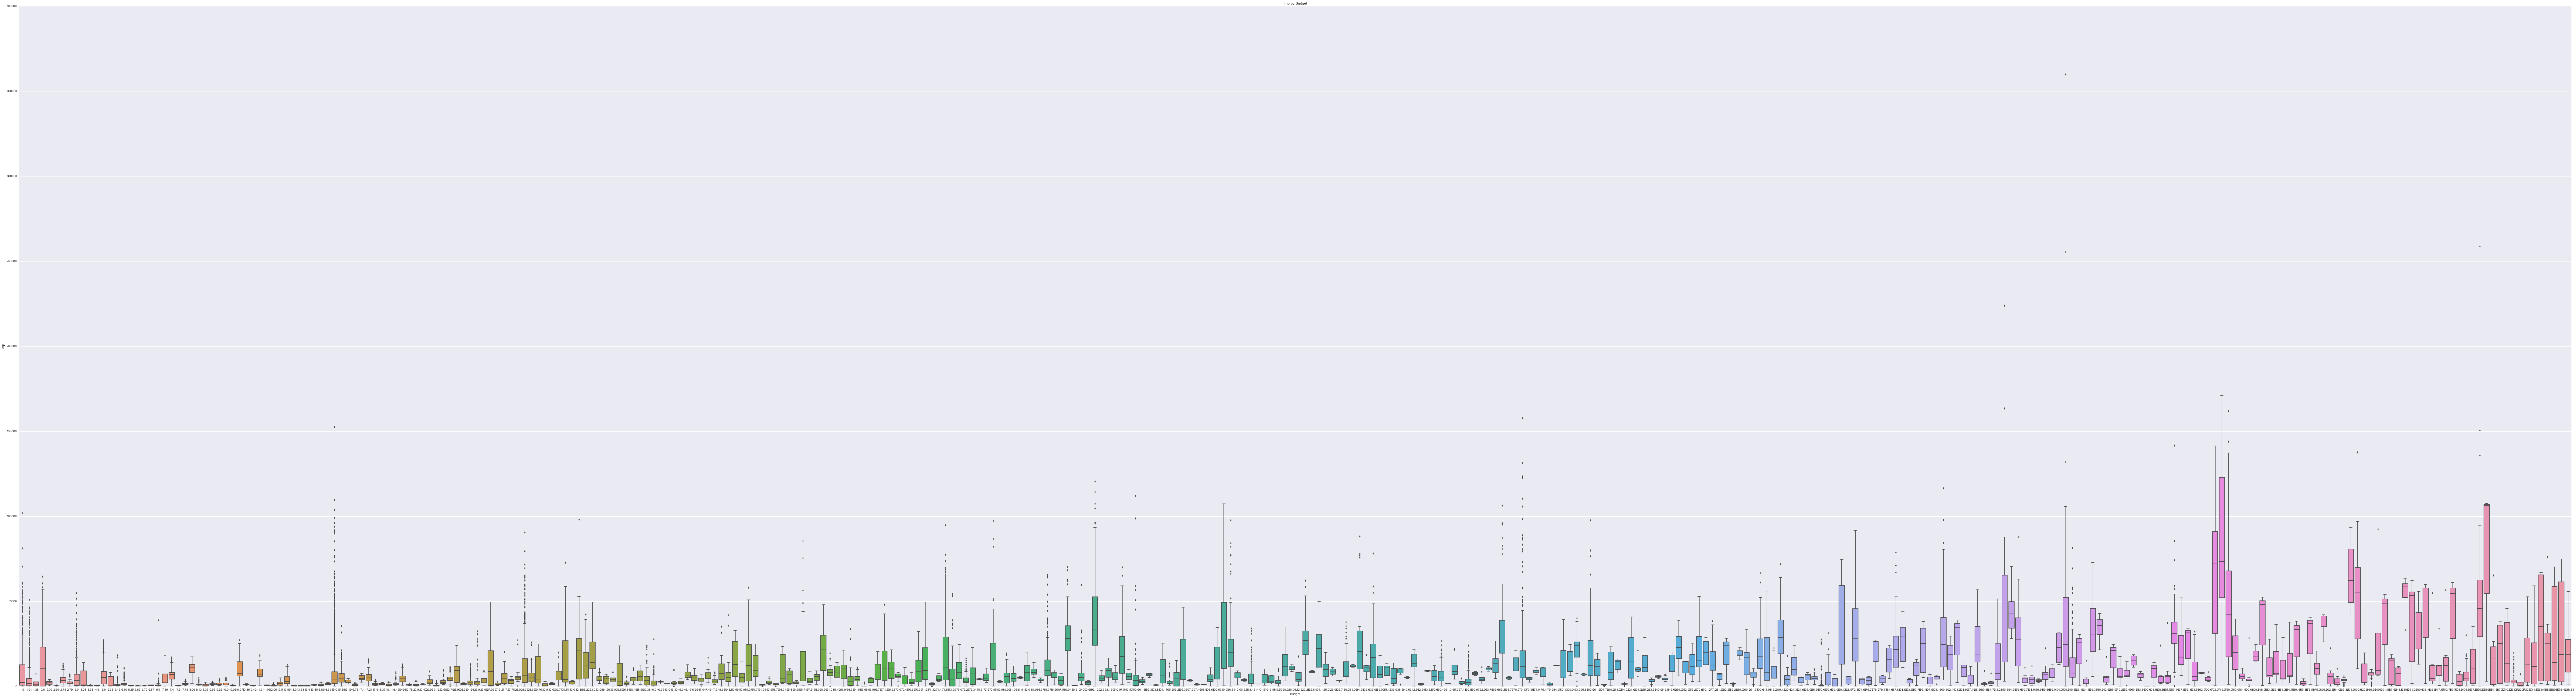

In [134]:
# Budget
fig, ax = plt.subplots(1,1, figsize=(150,40))
ax.set_title('Imp by Budget')
# Create a seaborn boxplot of counts by month ordered by increasing month
sns.boxplot(x=df_no_placement["Budget"].order(), y=df_no_placement['Impressions'])
ax.set_xlabel('Budget')
ax.set_ylabel('Imp')

fig_name = "Imp_by_Budget"+'.png'
print fig_name
fig.savefig(fig_name)

##Imp by Adset Age

Imp_by_Ad_Set_Age.png


/Users/waynestock2000/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: FutureWarning: order is deprecated, use sort_values(...)


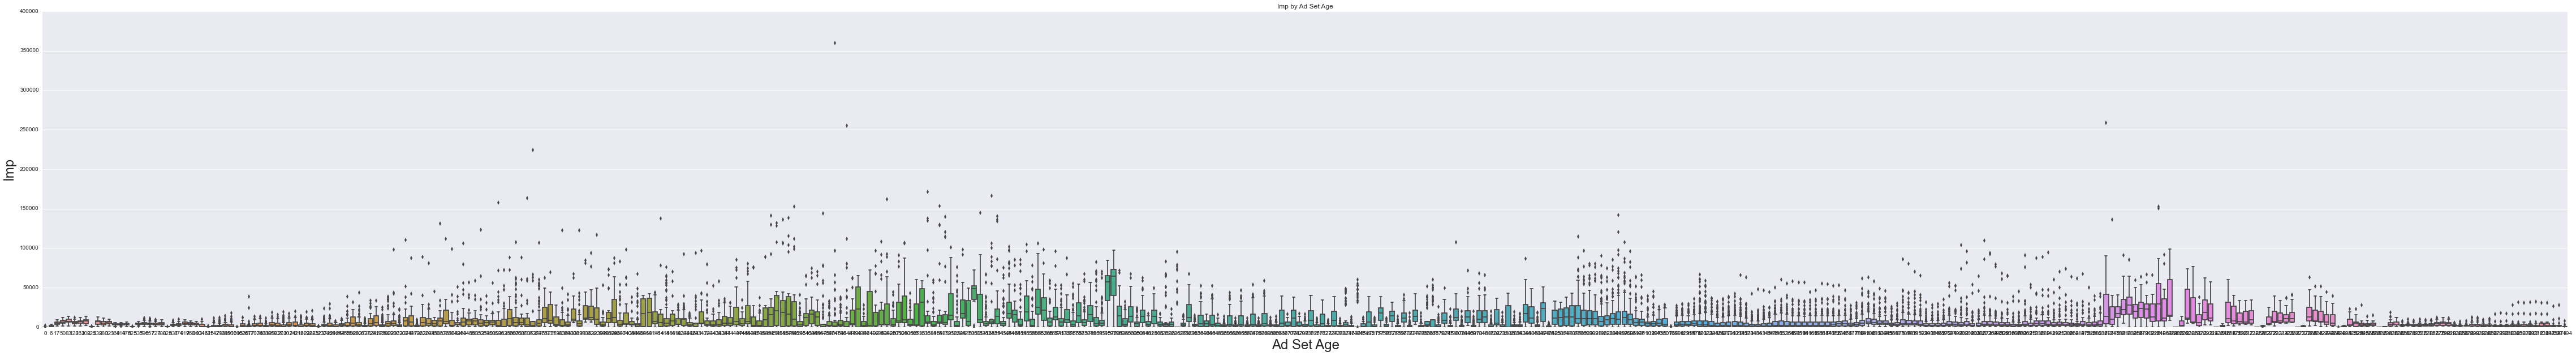

In [135]:
# Adset Age
fig, ax = plt.subplots(1,1, figsize=(80,10))
ax.set_title('Imp by Ad Set Age')
# Create a seaborn boxplot of counts by month ordered by increasing month
sns.boxplot(x=df_no_placement["Ad Set Age"].order(), y=df_no_placement['Impressions'])
ax.set_xlabel('Ad Set Age', size=24)
ax.set_ylabel('Imp', size=24)

fig_name = "Imp_by_Ad_Set_Age"+'.png'
print fig_name
fig.savefig(fig_name)

#What I learned from the Visualizations

###There really isn't a pattern I could see for how to predict more impressions for a given adset. Certainly a larger budget (which means more spend) translates into more impressions, but it did die off at one point which was interesting (right around the last fifth of the graph). 

###Really interesting about the ad set age. It looked like there were two different peaks for the adset ages. However, this could have been attributed to there being much fewer adsets that ever lasted more than 100 days per se.

###The Day of Week made sense from what I've seen and what I know about historic spending patterns. It maybe would have been better to make a weekday vs weekend feature instead of a day of week. 

### The day of year is really a reflection of audience saturation in my opinion. I'd like to see CPM plotted over that same time period. It also is a reflection of the facebook platform changing and perhaps getting more expensive

#How did I chose which features to keep

I only wanted to use features that were historic or unrelated to that adsets performance for the day in question. For example, I used how much the adset had previously spent, but didn't use that previous day's clicks.

However, in retrospect, I should have used the previous day's worth of impressions as a feature as well as the previous day's spend and reach. That would have been good.

#Details of Modeling Process
As you will see below: first I normalized the data using Z-scores. 

From there I knew that this was a supervised-continuous problem so I used regression models starting from the most basic linear regression to KNN and SGD Regression.

I tried adjusting the different parameters of the different models to get the highest score possible.

#Let's do some Z-scores

In [139]:
df_no_placement.describe()

,Day of Year,Day of Week,CPM,Bid Type: _ABSOLUTE_OCPM,Bid Type: _CPA,Bid Type: _CPC,Ad Set Age,Historic Reach,Historic Impressions,Historic Spend,Budget,Impressions
count,31751.000000,31751.000000,31751.000000,31751.000000,31751.000000,31751.000000,31751.000000,3.175100e+04,3.175100e+04,3.175100e+04,31751.000000,31751.000000
mean,215.697584,3.002961,8.461284,0.882303,0.003464,0.054896,9570.695726,1.000388e+12,1.061284e+12,9.704679e+09,140.135260,7053.685616
std,83.735046,2.017527,4.894018,0.322254,0.058759,0.227781,6711.451394,7.696114e+11,8.229412e+11,7.283811e+09,498.534971,12835.941226
min,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000
25%,173.000000,1.000000,5.471632,1.000000,0.000000,0.000000,3948.000000,1.805130e+11,1.855055e+11,1.977832e+09,5.000000,821.000000
50%,225.000000,3.000000,7.922252,1.000000,0.000000,0.000000,7924.000000,1.001852e+12,1.053831e+12,9.954658e+09,15.000000,2772.000000
75%,273.000000,5.000000,10.992158,1.000000,0.000000,0.000000,15266.000000,1.767220e+12,1.875936e+12,1.688977e+10,85.070000,7499.000000
max,357.000000,6.000000,60.000000,1.000000,1.000000,1.000000,23194.000000,2.190005e+12,2.359934e+12,2.089786e+10,11138.310000,359750.000000


In [140]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [142]:
# Select the data fields
df_norm = df_no_placement.iloc[:, :]
# Perform the standardization operation
df_norm = (df_norm - df_norm.mean())/df_norm.std()
# Summarize the results and notice we've done the same thing
df_norm.describe()

,Day of Year,Day of Week,CPM,Bid Type: _ABSOLUTE_OCPM,Bid Type: _CPA,Bid Type: _CPC,Ad Set Age,Historic Reach,Historic Impressions,Historic Spend,Budget,Impressions
count,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04,3.175100e+04
mean,9.386352e-15,-3.399456e-16,-9.886887e-15,-8.200604e-14,6.570717e-15,7.008533e-14,-1.216942e-14,-2.120895e-14,-2.572656e-14,-3.674069e-15,-5.990907e-15,-3.924996e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.050487e+00,-1.488436e+00,-1.728903e+00,-2.737910e+00,-5.896094e-02,-2.410035e-01,-1.426025e+00,-1.299862e+00,-1.289623e+00,-1.332363e+00,-2.790883e-01,-5.494483e-01
25%,-5.099130e-01,-9.927799e-01,-6.108788e-01,3.652306e-01,-5.896094e-02,-2.410035e-01,-8.377764e-01,-1.065311e+00,-1.064205e+00,-1.060825e+00,-2.710648e-01,-4.855651e-01
50%,1.110935e-01,-1.467408e-03,-1.101411e-01,3.652306e-01,-5.896094e-02,-2.410035e-01,-2.453561e-01,1.901803e-03,-9.056193e-03,3.431984e-02,-2.510060e-01,-3.335701e-01
75%,6.843301e-01,9.898451e-01,5.171361e-01,3.652306e-01,-5.896094e-02,-2.410035e-01,8.485950e-01,9.963876e-01,9.899280e-01,9.864462e-01,-1.104542e-01,3.469277e-02
max,1.687494e+00,1.485501e+00,1.053096e+01,3.652306e-01,1.695985e+01,4.149187e+00,2.029860e+00,1.545737e+00,1.578060e+00,1.536721e+00,2.206099e+01,2.747725e+01


In [143]:
df_norm.corr()

,Day of Year,Day of Week,CPM,Bid Type: _ABSOLUTE_OCPM,Bid Type: _CPA,Bid Type: _CPC,Ad Set Age,Historic Reach,Historic Impressions,Historic Spend,Budget,Impressions
Day of Year,1.000000,-0.006660,-0.138533,-0.353175,0.081191,0.207104,0.384474,0.927299,0.926525,0.932527,0.057354,-0.052452
Day of Week,-0.006660,1.000000,0.082691,0.001456,0.000711,-0.000628,-0.017408,-0.012802,-0.012887,-0.012715,0.007959,-0.015977
CPM,-0.138533,0.082691,1.000000,0.255708,-0.035725,-0.045463,-0.150840,-0.087671,-0.082805,-0.096317,0.058477,0.009265
Bid Type: _ABSOLUTE_OCPM,-0.353175,0.001456,0.255708,1.000000,-0.161435,-0.659867,0.251973,-0.399102,-0.400785,-0.393484,0.094522,0.112442
Bid Type: _CPA,0.081191,0.000711,-0.035725,-0.161435,1.000000,-0.014210,-0.025237,0.080067,0.080992,0.079070,-0.015589,-0.029150
Bid Type: _CPC,0.207104,-0.000628,-0.045463,-0.659867,-0.014210,1.000000,-0.182688,0.242060,0.242865,0.237953,-0.061233,-0.102671
Ad Set Age,0.384474,-0.017408,-0.150840,0.251973,-0.025237,-0.182688,1.000000,0.288493,0.284572,0.300603,-0.029226,0.014973
Historic Reach,0.927299,-0.012802,-0.087671,-0.399102,0.080067,0.242060,0.288493,1.000000,0.999946,0.999737,0.059168,-0.111745
Historic Impressions,0.926525,-0.012887,-0.082805,-0.400785,0.080992,0.242865,0.284572,0.999946,1.000000,0.999507,0.058853,-0.111691
Historic Spend,0.932527,-0.012715,-0.096317,-0.393484,0.079070,0.237953,0.300603,0.999737,0.999507,1.000000,0.058653,-0.112837


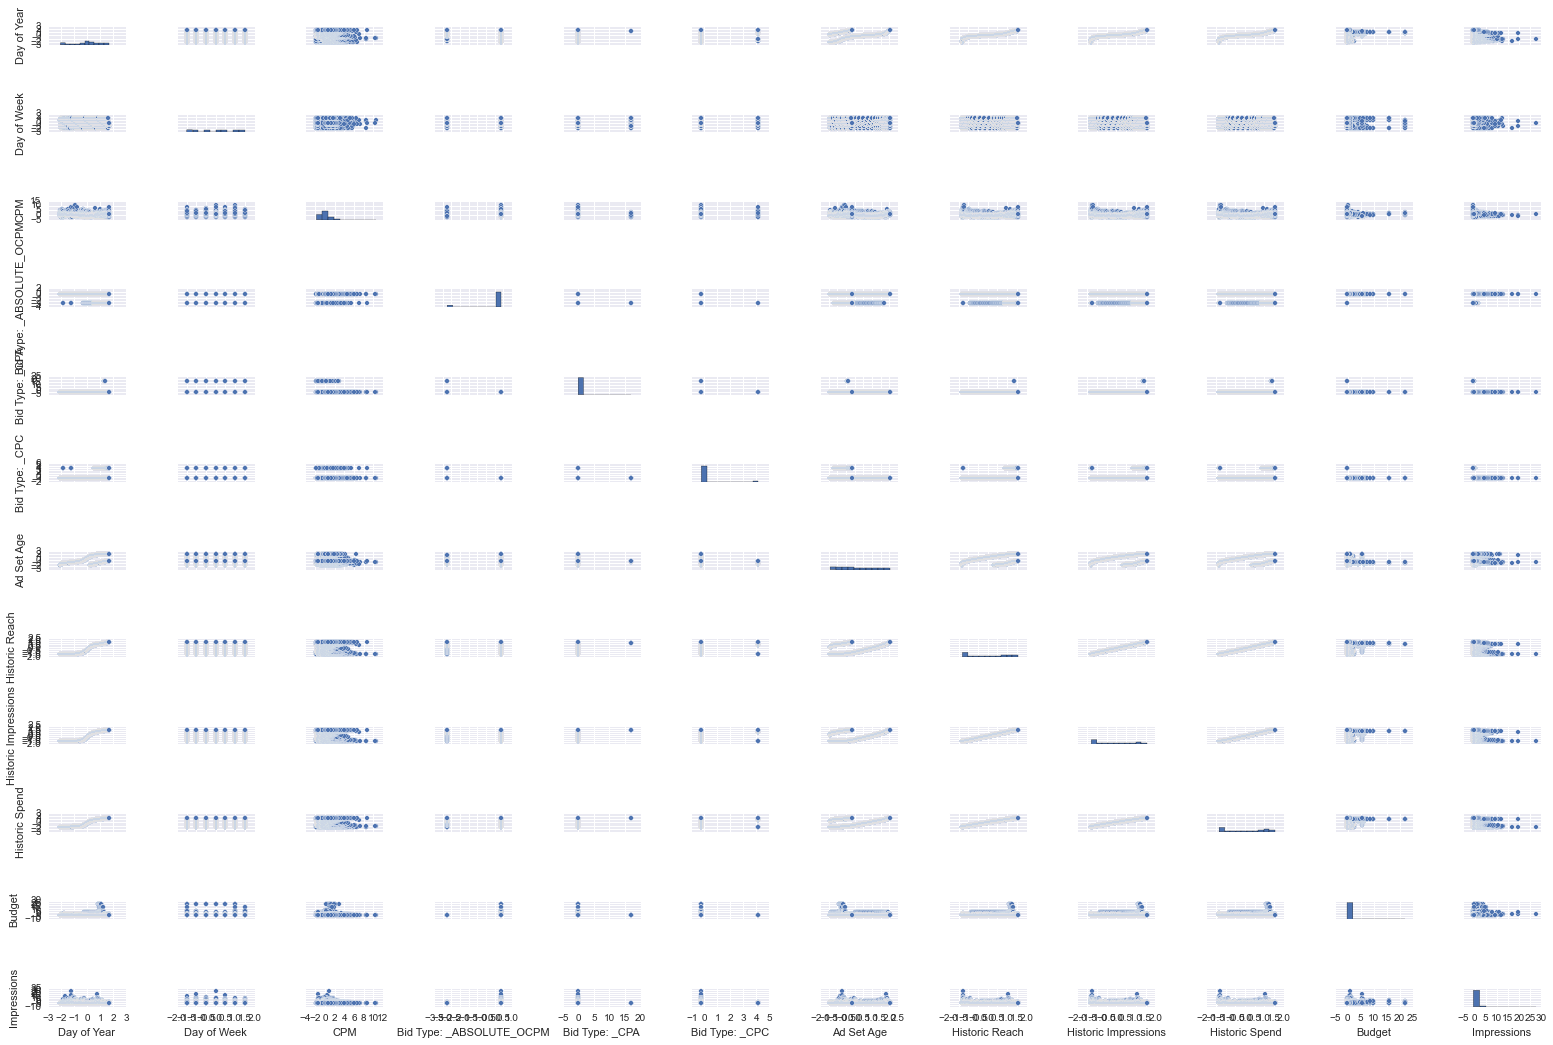

In [144]:
sns.pairplot(df_norm, size = 1.2, aspect=1.5)



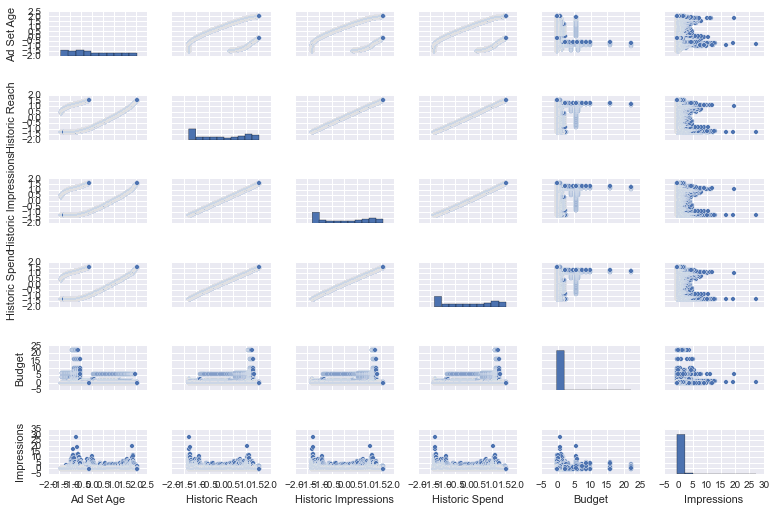

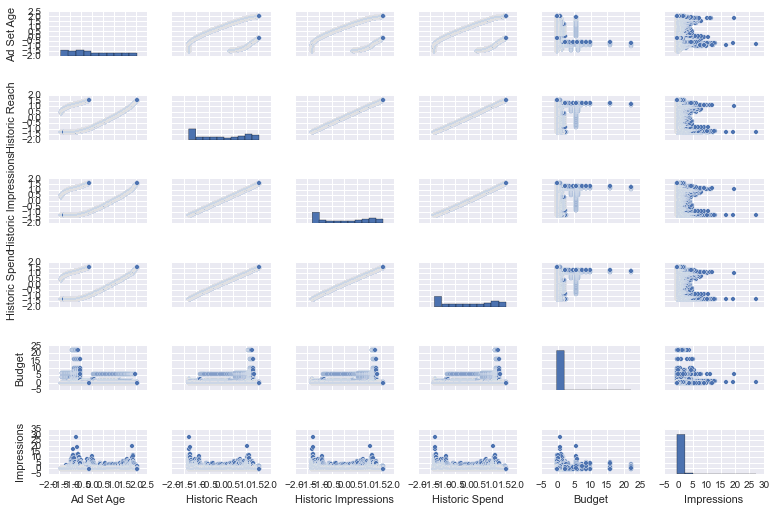

In [145]:
sns.pairplot(df_norm[columns_to_keep_2], size = 1.2, aspect=1.5)

fig_corr = sns.pairplot(df_norm[columns_to_keep_2], size = 1.2, aspect=1.5)
fig_corr.savefig('Correlation_graphs.png')

In [146]:
print "The columns are ", df_norm.columns

The columns are  Index([u'Day of Year', u'Day of Week', u'CPM', u'Bid Type: _ABSOLUTE_OCPM',
       u'Bid Type: _CPA', u'Bid Type: _CPC', u'Ad Set Age', u'Historic Reach',
       u'Historic Impressions', u'Historic Spend', u'Budget', u'Impressions'],
      dtype='object')


In [147]:
#get rid of cpm column
del df_norm['CPM']
df_norm.head()

,Day of Year,Day of Week,Bid Type: _ABSOLUTE_OCPM,Bid Type: _CPA,Bid Type: _CPC,Ad Set Age,Historic Reach,Historic Impressions,Historic Spend,Budget,Impressions
0,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415,-0.543995
1,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415,-0.538697
2,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415,-0.541969
3,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415,-0.542047
4,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415,-0.541891


In [148]:
print "The columns are ", df_norm.columns

The columns are  Index([u'Day of Year', u'Day of Week', u'Bid Type: _ABSOLUTE_OCPM',
       u'Bid Type: _CPA', u'Bid Type: _CPC', u'Ad Set Age', u'Historic Reach',
       u'Historic Impressions', u'Historic Spend', u'Budget', u'Impressions'],
      dtype='object')


In [149]:
print df_norm.columns
col_order = ['Impressions', 'Day of Year', 'Day of Week', 'Bid Type: _ABSOLUTE_OCPM', 'Bid Type: _CPA', 'Bid Type: _CPC', 'Ad Set Age', 'Historic Reach', 'Historic Impressions', 'Historic Spend', 'Budget',]

df_norm = df_norm[col_order]
print df_norm.columns

Index([u'Day of Year', u'Day of Week', u'Bid Type: _ABSOLUTE_OCPM',
       u'Bid Type: _CPA', u'Bid Type: _CPC', u'Ad Set Age', u'Historic Reach',
       u'Historic Impressions', u'Historic Spend', u'Budget', u'Impressions'],
      dtype='object')
Index([u'Impressions', u'Day of Year', u'Day of Week',
       u'Bid Type: _ABSOLUTE_OCPM', u'Bid Type: _CPA', u'Bid Type: _CPC',
       u'Ad Set Age', u'Historic Reach', u'Historic Impressions',
       u'Historic Spend', u'Budget'],
      dtype='object')


In [150]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RidgeCV

In [151]:
print df_norm.columns

xcols = [x.replace(' ', '') for x in df_norm.columns]


print xcols

Index([u'Impressions', u'Day of Year', u'Day of Week',
       u'Bid Type: _ABSOLUTE_OCPM', u'Bid Type: _CPA', u'Bid Type: _CPC',
       u'Ad Set Age', u'Historic Reach', u'Historic Impressions',
       u'Historic Spend', u'Budget'],
      dtype='object')
['Impressions', 'DayofYear', 'DayofWeek', 'BidType:_ABSOLUTE_OCPM', 'BidType:_CPA', 'BidType:_CPC', 'AdSetAge', 'HistoricReach', 'HistoricImpressions', 'HistoricSpend', 'Budget']


In [152]:
#switch the column names to not have any spaces
df_norm1 = df_norm
df_norm1.columns = xcols
df_norm1.head()

df_norm = df_norm1
df_norm.head()

,Impressions,DayofYear,DayofWeek,BidType:_ABSOLUTE_OCPM,BidType:_CPA,BidType:_CPC,AdSetAge,HistoricReach,HistoricImpressions,HistoricSpend,Budget
0,-0.543995,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415
1,-0.538697,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415
2,-0.541969,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415
3,-0.542047,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415
4,-0.541891,-2.050487,0.989845,0.365231,-0.058961,-0.241003,-1.426025,-1.299862,-1.289623,-1.332363,-0.274415


#OLS Regression
###OLS Regression:
Tries to fit the data to a function that most fits the data
It is the simplest form of regression
Probably a good place to start!

In [154]:
print df_norm.columns
print df_norm.columns[6:]

Index([u'Impressions', u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM',
       u'BidType:_CPA', u'BidType:_CPC', u'AdSetAge', u'HistoricReach',
       u'HistoricImpressions', u'HistoricSpend', u'Budget'],
      dtype='object')
Index([u'AdSetAge', u'HistoricReach', u'HistoricImpressions', u'HistoricSpend',
       u'Budget'],
      dtype='object')


#Regression with SKLearn


In [155]:
#Testing all features in df_norm
print "Using: ", df_norm.columns

# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
X = df_norm.iloc[:, 1:]
# Choose the response variable(s)
y = df_norm.iloc[:, 0]
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

Using:  Index([u'Impressions', u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM',
       u'BidType:_CPA', u'BidType:_CPC', u'AdSetAge', u'HistoricReach',
       u'HistoricImpressions', u'HistoricSpend', u'Budget'],
      dtype='object')


0.16579826283881249

In [156]:
#Testing with AdsetAge, Historic Reach, Historic Impressions, Historic Spend ONLY as features
print "Using: ", df_norm.columns[6:]

# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df_norm.iloc[:, 6:]
# Choose the response variable(s)
y = df_norm.iloc[:, 0]
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

Using:  Index([u'AdSetAge', u'HistoricReach', u'HistoricImpressions', u'HistoricSpend',
       u'Budget'],
      dtype='object')


0.077828963491896053

In [157]:
#Testing all features without Day of Year and Day of week
print "Using: ", df_norm.columns[3:]

# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df_norm.iloc[:, 3:]
# Choose the response variable(s)
y = df_norm.iloc[:, 0]
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

Using:  Index([u'BidType:_ABSOLUTE_OCPM', u'BidType:_CPA', u'BidType:_CPC',
       u'AdSetAge', u'HistoricReach', u'HistoricImpressions', u'HistoricSpend',
       u'Budget'],
      dtype='object')


0.080783816134738839

In [158]:
#Testing all features except Day of Year
print "Using: ", df_norm.columns[2:]

# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df_norm.iloc[:, 2:]
# Choose the response variable(s)
y = df_norm.iloc[:, 0]
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

Using:  Index([u'DayofWeek', u'BidType:_ABSOLUTE_OCPM', u'BidType:_CPA',
       u'BidType:_CPC', u'AdSetAge', u'HistoricReach', u'HistoricImpressions',
       u'HistoricSpend', u'Budget'],
      dtype='object')


0.081090499912304104

In [159]:
#Testing all features without Day of Year and Day of week
print "Using: ", df_norm.columns[-1]

# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df_norm.iloc[:, 10:]
# Choose the response variable(s)
y = df_norm.iloc[:, 0]
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

Using:  Budget


0.048815565574543029

In [160]:
#Testing all features without Day of Year and Day of week
print "Using: ", df_norm.columns[7:10]

# Create an empty model
lr = LinearRegression()
# Choose the predictor variables, here all but the first which is the response variable
# This model is analogous to the Y ~ X1 + X2 + X3 + X4 + X5 + X6 model
X = df_norm.iloc[:, 7:10]
# Choose the response variable(s)
y = df_norm.iloc[:, 0]
# Fit the model to the full dataset
lr.fit(X, y)
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

Using:  Index([u'HistoricReach', u'HistoricImpressions', u'HistoricSpend'], dtype='object')


0.016958614303750452

##OK so that wasn't so good, let's try doing some train test splits

In [161]:
#Using all features
print "Features: ", df_norm.columns
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

Features:  Index([u'Impressions', u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM',
       u'BidType:_CPA', u'BidType:_CPC', u'AdSetAge', u'HistoricReach',
       u'HistoricImpressions', u'HistoricSpend', u'Budget'],
      dtype='object')


0.16315011179313332

In [162]:
#No date features (day of week, day of year)
print "Features: ", df_norm.columns
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 2:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

Features:  Index([u'Impressions', u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM',
       u'BidType:_CPA', u'BidType:_CPC', u'AdSetAge', u'HistoricReach',
       u'HistoricImpressions', u'HistoricSpend', u'Budget'],
      dtype='object')


0.09302105091669155

In [163]:
#No day of year
print "Features: ", df_norm.columns[2]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

Features:  DayofWeek


0.15670432091158981

In [164]:
#Only Day of week
print "Features: ", df_norm.columns[2]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 2:3]

print X.columns

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)

Features:  DayofWeek
Index([u'DayofWeek'], dtype='object')


-0.00017075996507576185

In [165]:
print "So this was the best!"

#Using all features!
print "Features: ", df_norm.columns[1:]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr.fit(X_train, y_train)
# Evaluate the model against the testing data
lr.score(X_test, y_test)



So this was the best!
Features:  Index([u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM', u'BidType:_CPA',
       u'BidType:_CPC', u'AdSetAge', u'HistoricReach', u'HistoricImpressions',
       u'HistoricSpend', u'Budget'],
      dtype='object')


0.14990582610259229

#So let's do some regularization to get those numbers up!

In [2]:

# Some helpful forum: http://stats.stackexchange.com/questions/58739/polynomial-regression-using-scikit-learn
# Documentation: http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions


##Documentation on Bayesian Ridge
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge

In [167]:
df_norm.corr()

,Impressions,DayofYear,DayofWeek,BidType:_ABSOLUTE_OCPM,BidType:_CPA,BidType:_CPC,AdSetAge,HistoricReach,HistoricImpressions,HistoricSpend,Budget
Impressions,1.000000,-0.052452,-0.015977,0.112442,-0.029150,-0.102671,0.014973,-0.111745,-0.111691,-0.112837,0.220942
DayofYear,-0.052452,1.000000,-0.006660,-0.353175,0.081191,0.207104,0.384474,0.927299,0.926525,0.932527,0.057354
DayofWeek,-0.015977,-0.006660,1.000000,0.001456,0.000711,-0.000628,-0.017408,-0.012802,-0.012887,-0.012715,0.007959
BidType:_ABSOLUTE_OCPM,0.112442,-0.353175,0.001456,1.000000,-0.161435,-0.659867,0.251973,-0.399102,-0.400785,-0.393484,0.094522
BidType:_CPA,-0.029150,0.081191,0.000711,-0.161435,1.000000,-0.014210,-0.025237,0.080067,0.080992,0.079070,-0.015589
BidType:_CPC,-0.102671,0.207104,-0.000628,-0.659867,-0.014210,1.000000,-0.182688,0.242060,0.242865,0.237953,-0.061233
AdSetAge,0.014973,0.384474,-0.017408,0.251973,-0.025237,-0.182688,1.000000,0.288493,0.284572,0.300603,-0.029226
HistoricReach,-0.111745,0.927299,-0.012802,-0.399102,0.080067,0.242060,0.288493,1.000000,0.999946,0.999737,0.059168
HistoricImpressions,-0.111691,0.926525,-0.012887,-0.400785,0.080992,0.242865,0.284572,0.999946,1.000000,0.999507,0.058853
HistoricSpend,-0.112837,0.932527,-0.012715,-0.393484,0.079070,0.237953,0.300603,0.999737,0.999507,1.000000,0.058653


In [168]:
#Trying Baysian Ridge
from sklearn.linear_model import BayesianRidge, LinearRegression

#No day of year
print "Features: ", df_norm.columns[2]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

bayRidge = BayesianRidge(compute_score=True)

bayRidge.fit(X_train,y_train)

print "Bay Ridge score: ", bayRidge.score(X_test, y_test)

lr_vb = LinearRegression() 
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Fit the model against the training data
lr_vb.fit(X_train, y_train)
# Evaluate the model against the testing data
print "Linear Regression score: ", lr_vb.score(X_test, y_test)


Features:  DayofWeek
Bay Ridge score:  0.16381050555
Linear Regression score:  0.163705749754


In [169]:
#Does changing the test size 

sizes = [0.1, 0.15, 0.2, 0.25, 0.3]

for size in xrange(len(sizes)):
    lr_vb = LinearRegression() 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sizes[size])
    lr_vb.fit(X_train, y_train)
    print "Size: ", sizes[size]
    print "Linear Regression score: ", lr_vb.score(X_test, y_test)

Size:  0.1
Linear Regression score:  0.18214365252
Size:  0.15
Linear Regression score:  0.156261271824
Size:  0.2
Linear Regression score:  0.153107719097
Size:  0.25
Linear Regression score:  0.168326695539
Size:  0.3
Linear Regression score:  0.170202693356


##Having a larger training set allows the machine to learn more but it increases the chances for overfitting

####So not that surprising that the 0.15 was better than  0.3: it allowed the machine to learn more and perhaps prevented as much overfitting as the 0.1 test size

In [170]:
#Trying multiple sizes with ridge

sizes = [0.1, 0.15, 0.2, 0.25, 0.3]

for size in xrange(len(sizes)):
    model = BayesianRidge(compute_score=True) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sizes[size])
    model.fit(X_train, y_train)
    print "Size: ", sizes[size]
    print "Linear Regression score: ", model.score(X_test, y_test)


Size:  0.1
Linear Regression score:  0.171643835481
Size:  0.15
Linear Regression score:  0.18446240184
Size:  0.2
Linear Regression score:  0.157852588831
Size:  0.25
Linear Regression score:  0.156407749972
Size:  0.3
Linear Regression score:  0.154202775297


###Bayesian Ridge with Normalize True

In [171]:
#Trying multiple sizes with ridge

sizes = [0.1, 0.15, 0.2, 0.25, 0.3]

for size in xrange(len(sizes)):
    model_1 = BayesianRidge(compute_score=True,normalize=False) 
    model_2 = BayesianRidge(compute_score=True,normalize=True) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sizes[size])
    model_1.fit(X_train, y_train)
    model_2.fit(X_train, y_train)
    print "Size: ", sizes[size]
    print "Bay Regression Normalize False: ", model_1.score(X_test, y_test)
    print "Bay Regression Normalize TRUE: ", model_2.score(X_test, y_test)

Size:  0.1
Bay Regression Normalize False:  0.179731727299
Bay Regression Normalize TRUE:  0.17973172667
Size:  0.15
Bay Regression Normalize False:  0.191319187531
Bay Regression Normalize TRUE:  0.191319187431
Size:  0.2
Bay Regression Normalize False:  0.147616178095
Bay Regression Normalize TRUE:  0.147616178273
Size:  0.25
Bay Regression Normalize False:  0.175648494564
Bay Regression Normalize TRUE:  0.175648493982
Size:  0.3
Bay Regression Normalize False:  0.155033191829
Bay Regression Normalize TRUE:  0.15503319189


##NORMALIZE=True or False DOESN'T Make any difference

In [172]:
sizes = [0.1, 0.15, 0.2, 0.25, 0.3]

for size in xrange(len(sizes)):
    model_1 = BayesianRidge(compute_score=False,normalize=True) 
    model_2 = BayesianRidge(compute_score=True,normalize=True) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sizes[size])
    model_1.fit(X_train, y_train)
    model_2.fit(X_train, y_train)
    print "Size: ", sizes[size]
    print "Bay Regression Compute Score False: ", model_1.score(X_test, y_test)
    print "Bay Regression Compute Score TRUE: ", model_2.score(X_test, y_test)

Size:  0.1
Bay Regression Compute Score False:  0.169845038619
Bay Regression Compute Score TRUE:  0.169845038619
Size:  0.15
Bay Regression Compute Score False:  0.17314940184
Bay Regression Compute Score TRUE:  0.17314940184
Size:  0.2
Bay Regression Compute Score False:  0.172003863446
Bay Regression Compute Score TRUE:  0.172003863446
Size:  0.25
Bay Regression Compute Score False:  0.152197966248
Bay Regression Compute Score TRUE:  0.152197966248
Size:  0.3
Bay Regression Compute Score False:  0.169348191114
Bay Regression Compute Score TRUE:  0.169348191114


##Compute Score T or F doesn't make a difference

##What about...
#Changing Alphas?
###Affecting gamma distribution

alpha_1 : float, optional
Hyper-parameter : shape parameter for the Gamma distribution prior over the alpha parameter. Default is 1.e-6

In [173]:
#Let's make some gammas
gammas = []

for gamma in xrange(1,20):
    gamma = gamma * 10**(-6)
    #print gamma
    gammas.append(gamma)
print gammas

[1e-06, 2e-06, 3e-06, 4e-06, 4.9999999999999996e-06, 6e-06, 7e-06, 8e-06, 9e-06, 9.999999999999999e-06, 1.1e-05, 1.2e-05, 1.3e-05, 1.4e-05, 1.4999999999999999e-05, 1.6e-05, 1.7e-05, 1.8e-05, 1.8999999999999998e-05]


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=sizes[size])
for gamma in xrange(len(gammas)):
    model_1 = BayesianRidge(compute_score=False,normalize=True, alpha_1=gammas[gamma])  
    model_1.fit(X_train, y_train)
    model_2.fit(X_train, y_train)
    print "Gamma: ", gammas[gamma]
    print "Bay Regression: ", model_1.score(X_test, y_test)
    

Gamma:  1e-06
Bay Regression:  0.172299635371
Gamma:  2e-06
Bay Regression:  0.172299635371
Gamma:  3e-06
Bay Regression:  0.172299635371
Gamma:  4e-06
Bay Regression:  0.172299635371
Gamma:  5e-06
Bay Regression:  0.172299635371
Gamma:  6e-06
Bay Regression:  0.172299635371
Gamma:  7e-06
Bay Regression:  0.172299635371
Gamma:  8e-06
Bay Regression:  0.172299635371
Gamma:  9e-06
Bay Regression:  0.172299635371
Gamma:  1e-05
Bay Regression:  0.172299635371
Gamma:  1.1e-05
Bay Regression:  0.172299635371
Gamma:  1.2e-05
Bay Regression:  0.172299635371
Gamma:  1.3e-05
Bay Regression:  0.172299635371
Gamma:  1.4e-05
Bay Regression:  0.172299635371
Gamma:  1.5e-05
Bay Regression:  0.172299635371
Gamma:  1.6e-05
Bay Regression:  0.172299635371
Gamma:  1.7e-05
Bay Regression:  0.172299635371
Gamma:  1.8e-05
Bay Regression:  0.172299635371
Gamma:  1.9e-05
Bay Regression:  0.172299635371


##Range of Gamma distribution doesn't change Outcome

#Let's try Lasso 
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso
Lasso:

(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [175]:
from sklearn import linear_model
#No day of year
print "Features: ", df_norm.columns[2]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



Features:  DayofWeek


In [176]:
print "Test 1: Just regular lasso, alpha 0.1"
Lasso = linear_model.Lasso(alpha=0.1)
Lasso.fit(X_train, y_train)
print "Score: ", Lasso.score(X_test, y_test)


Test 1: Just regular lasso, alpha 0.1
Score:  0.0477231035526


##Try with different alphas

In [177]:
alphas = []

for alpha in xrange(0,101, 5):
    alpha = (alpha * .001)
    pos_alpha = .1 + alpha
    alphas.append(pos_alpha)
    neg_alpha = .1 - alpha
    alphas.append(neg_alpha)
    
print alphas
    

[0.1, 0.1, 0.10500000000000001, 0.095, 0.11, 0.09000000000000001, 0.115, 0.085, 0.12000000000000001, 0.08, 0.125, 0.07500000000000001, 0.13, 0.07, 0.135, 0.065, 0.14, 0.060000000000000005, 0.14500000000000002, 0.05500000000000001, 0.15000000000000002, 0.05, 0.155, 0.045000000000000005, 0.16, 0.04000000000000001, 0.165, 0.035, 0.17, 0.03, 0.175, 0.02500000000000001, 0.18, 0.020000000000000004, 0.185, 0.015, 0.19, 0.010000000000000009, 0.195, 0.0050000000000000044, 0.2, 0.0]


In [178]:
for alpha in xrange(len(alphas)):
    Lasso = linear_model.Lasso(alpha=alphas[alpha])
    Lasso.fit(X_train, y_train)
    print "Alpha: ", alphas[alpha]
    print "Score: ", Lasso.score(X_test, y_test)
    print "---"

Alpha:  0.1
Score:  0.0477231035526
---
Alpha:  0.1
Score:  0.0477231035526
---
Alpha:  0.105
Score:  0.0453224998519
---
Alpha:  0.095
Score:  0.0500017481617
---
Alpha:  0.11
Score:  0.0427999370854
---
Alpha:  0.09
Score:  0.0521584336589
---
Alpha:  0.115
Score:  0.0401554152044
---
Alpha:  0.085
Score:  0.0543486246374
---
Alpha:  0.12
Score:  0.0376572225629
---
Alpha:  0.08
Score:  0.0567016070859
---
Alpha:  0.125
Score:  0.036227914452
---
Alpha:  0.075
Score:  0.0589034069672
---
Alpha:  0.13
Score:  0.0347356111454
---
Alpha:  0.07
Score:  0.0609540228619
---
Alpha:  0.135
Score:  0.0331803126432
---
Alpha:  0.065
Score:  0.0628534534073
---
Alpha:  0.14
Score:  0.0315620189453
---
Alpha:  0.06
Score:  0.0646016972446
---
Alpha:  0.145
Score:  0.0298807300518
---
Alpha:  0.055
Score:  0.0661986910253
---
Alpha:  0.15
Score:  0.0281364459627
---
Alpha:  0.05
Score:  0.0676445624426
---
Alpha:  0.155
Score:  0.026329166678
---
Alpha:  0.045
Score:  0.068939243514
---
Alpha:  0

/Users/waynestock2000/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()


##Well changing the alpha didn't do that much
###The scores were no better than the regular linear regression models where the score varied from .14 to .18

#Perhaps! Linear regression is not the right model

##Shall we try other regression models?

## -----------------------------------------
#Polynomial Regression with pre processing
## -----------------------------------------

##Documentation
http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions


In [179]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#No day of year
print "Features: ", df_norm.columns[2]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



Features:  DayofWeek


Using fit transform:
http://stackoverflow.com/questions/23838056/what-is-the-difference-between-transform-and-fit-transform-in-sklearn

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
print "Lin Reg Score: ", lr.score(X_test, y_test)

Lin Reg Score:  0.162697940936


In [181]:
print "Transforming X to a polynomial, 2 degrees"
poly = PolynomialFeatures(degree=2)
X_tran = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size=0.3)
lr = LinearRegression()
lr.fit(X_train, y_train)
print "Poly Tran D2 Score: ", lr.score(X_test, y_test)

Transforming X to a polynomial, 2 degrees
Poly Tran D2 Score:  0.306301284628


#Polynomial Degree two was way better than linear regression!
####Lin Reg score: ~ 0.15

####Poly Tran D2 Score: ~0.28 *****

###Maybe there are better polynomial degrees?


In [182]:
df_norm.shape

(31751, 11)

In [183]:
for deg in xrange(2,5):
    poly = PolynomialFeatures(degree=deg)
    X_tran = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print "Degree: ", deg
    print "Score: ", lr.score(X_test, y_test)

Degree:  2
Score:  0.299078871796
Degree:  3
Score:  0.369426344304
Degree:  4
Score:  0.437861402091


##How about cross val score?
###cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')[source]
http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html



more cross val info:
http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [184]:
# Do the same thing but with cross val score
from sklearn.cross_validation import cross_val_score

for deg in xrange(2,5):
    poly = PolynomialFeatures(degree=deg)
    X_tran = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print "Degree: ", deg
    print "Score: ", lr.score(X_test, y_test)
    print "Cross Val", cross_val_score(lr, X_tran, y=y)


Degree:  2
Score:  0.300578744828
Cross Val [ -8.34703555e+04  -3.01019571e+00  -3.76972813e+22]
Degree:  3
Score:  0.404433376617
Cross Val [ -4.53641157e+06  -1.57138281e+02  -5.63942635e+22]
Degree:  4
Score:  0.389969948315
Cross Val [ -2.28240035e+12  -1.17214490e+06  -3.48035162e+22]


#So Polynomial 4 is the best

#Could it be logistic?

###Documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

####class sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

In [185]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
#No day of year
print "Features: ", df_norm.columns[2]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

Features:  DayofWeek


### Try with non-polynomial data first

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr = LinearRegression()
lr.fit(X_train, y_train)
print "Linear Reg: ", lr.score(X_test, y_test)
#LogReg = LogisticRegression()
#LogReg.fit(X_train, y_train)
#LogReg.score(X_test, y_test)
#print "cross val: ", cross_val_score(LogReg, X, y=y)


Linear Reg:  0.169020470862


#KNN Regression

##Documentation
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
class sklearn.neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)

In [187]:
from sklearn.neighbors import KNeighborsRegressor

#No day of year
print "Features: ", df_norm.columns[2]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

Features:  DayofWeek


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

KNN_Reg = KNeighborsRegressor(n_neighbors=5)
KNN_Reg.fit(X_train, y_train)
print "KNN Score: ", KNN_Reg.score(X_test, y_test)
print "Cross Val: ", cross_val_score(KNN_Reg, X, y=y)

KNN Score:  0.369981922394
Cross Val:  [-0.13162519 -3.01595067  0.05590984]


##What number of neighbors produces the best scores?


In [189]:
for neigh in xrange(3,11):
    KNN_Reg = KNeighborsRegressor(n_neighbors=neigh)
    KNN_Reg.fit(X_train, y_train)
    print "KNN #: ", neigh
    print "KNN Score: ", KNN_Reg.score(X_test, y_test)
    print "Cross Val: ", cross_val_score(KNN_Reg, X, y=y)
    print "------"

KNN #:  3
KNN Score:  0.347035509939
Cross Val:  [-0.14304076 -3.6343727   0.02768077]
------
KNN #:  4
KNN Score:  0.363452274433
Cross Val:  [-0.13521037 -3.72376437  0.04548611]
------
KNN #:  5
KNN Score:  0.369981922394
Cross Val:  [-0.13162519 -3.01595067  0.05590984]
------
KNN #:  6
KNN Score:  0.374352661372
Cross Val:  [-0.13734133 -2.31929228  0.05977413]
------
KNN #:  7
KNN Score:  0.376862419749
Cross Val:  [-0.14279563 -1.93290216  0.05517888]
------
KNN #:  8
KNN Score:  0.376184254313
Cross Val:  [-0.14707336 -1.65422678  0.06021851]
------
KNN #:  9
KNN Score:  0.379374781882
Cross Val:  [-0.14617234 -1.53035733  0.06109143]
------
KNN #:  10
KNN Score:  0.376969240032
Cross Val:  [-0.15235813 -1.46938241  0.06746566]
------


#Higher the number of neighbors, better the score
##But doesn't that mean more overfitting?

# ------

#How does making it a Polynomial regression problem improve the score?

#####Use Polynomial degree 4

#####Use KNN Neigh 10

In [190]:
print "Polynomial Degree: 4"
print "KNN Neighbors: 10"
poly = PolynomialFeatures(degree=4)
X_tran = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size=0.3)
KNN_Reg = KNeighborsRegressor(n_neighbors=10)
KNN_Reg.fit(X_train, y_train)
print "KNN Score: ", KNN_Reg.score(X_test, y_test)
print "Cross Val: ", cross_val_score(KNN_Reg, X, y=y)

Polynomial Degree: 4
KNN Neighbors: 10
KNN Score:  0.400075263857
Cross Val:  [-0.15235813 -1.46938241  0.06746566]


In [191]:
print "Polynomial Degree: 3"
print "KNN Neighbors: 10"
poly = PolynomialFeatures(degree=3)
X_tran = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size=0.3)
KNN_Reg = KNeighborsRegressor(n_neighbors=10)
KNN_Reg.fit(X_train, y_train)
print "KNN Score: ", KNN_Reg.score(X_test, y_test)
print "Cross Val: ", cross_val_score(KNN_Reg, X, y=y)

Polynomial Degree: 3
KNN Neighbors: 10
KNN Score:  0.404573191709
Cross Val:  [-0.15235813 -1.46938241  0.06746566]


In [192]:
print "Polynomial Degree: 2"
print "KNN Neighbors: 10"
poly = PolynomialFeatures(degree=2)
X_tran = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size=0.3)
KNN_Reg = KNeighborsRegressor(n_neighbors=10)
KNN_Reg.fit(X_train, y_train)
print "KNN Score: ", KNN_Reg.score(X_test, y_test)
print "Cross Val: ", cross_val_score(KNN_Reg, X, y=y)

Polynomial Degree: 2
KNN Neighbors: 10
KNN Score:  0.389548958005
Cross Val:  [-0.15235813 -1.46938241  0.06746566]


#Let's see what SVM looks like

### Some notes on SVMs
http://scikit-learn.org/stable/modules/svm.html

###The advantages of support vector machines are:
####Effective in high dimensional spaces.
####Still effective in cases where number of dimensions is greater than the number of samples.
####Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
####Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

###The disadvantages of support vector machines include:
####If the number of features is much greater than the number of samples, the method is likely to give poor performances.
####SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).

##SVM Reggression:


The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.
The model produced by support vector classification (as described above) depends only on a subset of the training data, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.
There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. LinearSVR provides a faster implementation than SVR but only considers linear kernels, while NuSVR implements a slightly different formulation than SVR and LinearSVR. See Implementation details for further details.

In [193]:
from sklearn import svm
from sklearn.svm import SVR

#No day of year
print "Features: ", df_norm.columns[2]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

Features:  DayofWeek


In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)
print svr_rbf.score(X_test, y_test)

cross_val_score(svr_rbf, X, y=y)


#SVRs: Conclusion
They were not better than KNN with polynomial regressors. 

##Scores:
####SVR RBF: ~0.28


#OK Let's try a few more Regression models
## <><><><><><><><>

#RANSAC
## What is RANSAC
RANSAC (RANdom SAmple Consensus) fits a model from random subsets of inliers from the complete data set.
RANSAC is a non-deterministic algorithm producing only a reasonable result with a certain probability, which is dependent on the number of iterations (see max_trials parameter). It is typically used for linear and non-linear regression problems and is especially popular in the fields of photogrammetric computer vision.

###How it works:
The algorithm splits the complete input sample data into a set of inliers, which may be subject to noise, and outliers, which are e.g. caused by erroneous measurements or invalid hypotheses about the data. The resulting model is then estimated only from the determined inliers.

##Advantage of RANSAC:
It rules out outliers for you. And bases it's results only on the inliers.


#Documentation:
http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression

####Good documenation on different regression models:
Save this link for later
http://scikit-learn.org/stable/modules/linear_model.html


##Syntax:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor

class sklearn.linear_model.RANSACRegressor(base_estimator=None, min_samples=None, residual_threshold=None, is_data_valid=None, is_model_valid=None, max_trials=100, stop_n_inliers=inf, stop_score=inf, stop_probability=0.99, residual_metric=None, random_state=None)


######If base_estimator is None, then base_estimator=sklearn.linear_model.LinearRegression() is used for target values of dtype float.

In [198]:
from sklearn.linear_model import RANSACRegressor

#No day of year
print "Features: ", df_norm.columns[1:]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Features:  Index([u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM', u'BidType:_CPA',
       u'BidType:_CPC', u'AdSetAge', u'HistoricReach', u'HistoricImpressions',
       u'HistoricSpend', u'Budget'],
      dtype='object')


In [199]:
RanSac = RANSACRegressor()
RanSac.fit(X_train, y_train)
print "RanSac score: ", RanSac.score(X_test,y_test)
print "Cross val: ", cross_val_score(RanSac, X, y=y)

RanSac score:  -106.56747046
Cross val:  [ -1.75306573e+00  -3.59362299e-01  -1.23936068e+05]


#Ransac Conclusion: Not good, particularly bad

##Default Parameters
###Score: -.16
###Cross val: [ -5.72607638e-01  -1.21391839e+00  -2.52439013e+03]

#Try SGD Regression

##What is SGD Regression
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.
SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

###The advantages of Stochastic Gradient Descent are:
####Efficiency.
####Ease of implementation (lots of opportunities for code tuning).
###The disadvantages of Stochastic Gradient Descent include:
####SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
####SGD is sensitive to feature scaling.

Documentation:
    http://scikit-learn.org/stable/modules/sgd.html

#SGD Regressor
## Syntax
Documentation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor

class sklearn.linear_model.SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, n_iter=5, shuffle=True, verbose=0, epsilon=0.1, random_state=None, learning_rate='invscaling', eta0=0.01, power_t=0.25, warm_start=False, average=False)[source]




In [200]:
from sklearn.linear_model import SGDRegressor

In [201]:
#All features
print "Features: ", df_norm.columns[1:]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Features:  Index([u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM', u'BidType:_CPA',
       u'BidType:_CPC', u'AdSetAge', u'HistoricReach', u'HistoricImpressions',
       u'HistoricSpend', u'Budget'],
      dtype='object')


In [202]:
print "All default SGDReg"
SGDReg = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True)
SGDReg.fit(X_train, y_train)
print "SGD Score: ", SGDReg.score(X_test, y_test)
print "Cross Val: ", cross_val_score(SGDReg, X, y=y)

All default SGDReg
SGD Score:  0.0803721387417
Cross Val:  [-0.13644436 -0.9239187  -0.64798865]


In [203]:
print "Test different loss Types"
print "~~~~~~~~~~~~~~"
losses = ["squared_loss", 'huber', "epsilon_insensitive", "squared_epsilon_insensitive"]

for l in xrange(0, len(losses)):
    #print losses[l]
    SGDReg = SGDRegressor(loss=losses[l], penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True)
    SGDReg.fit(X_train, y_train)
    print "##Loss type: ", losses[l]
    print "####Score: ", SGDReg.score(X_test, y_test)
    print "####Cross Val: ", cross_val_score(SGDReg, X, y=y)
    print "<><><><><><><>"

Test different loss Types
~~~~~~~~~~~~~~
##Loss type:  squared_loss
####Score:  0.0866920279968
####Cross Val:  [-0.12115622 -0.79962527 -0.71683716]
<><><><><><><>
##Loss type:  huber
####Score:  -0.0234924055772
####Cross Val:  [-0.16427293  0.01543972 -0.0004845 ]
<><><><><><><>
##Loss type:  epsilon_insensitive
####Score:  -0.0243717356258
####Cross Val:  [-0.16588798 -0.0003227  -0.0074107 ]
<><><><><><><>
##Loss type:  squared_epsilon_insensitive
####Score:  0.0856745883621
####Cross Val:  [-0.11362957 -1.19995896 -0.68158399]
<><><><><><><>


#Penalty Types
###‘none’, ‘l2’, ‘l1’, or ‘elasticnet’

##### The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.

In [204]:
penalties = ['none', 'l2', 'l1', 'elasticnet']


for p in xrange(0, len(penalties)):
    #print losses[l]
    SGDReg = SGDRegressor(loss='squared_loss', penalty=penalties[p], alpha=0.0001, l1_ratio=0.15, fit_intercept=True)
    SGDReg.fit(X_train, y_train)
    print "##Penalty type: ", penalties[p]
    print "####Score: ", SGDReg.score(X_test, y_test)
    print "####Cross Val: ", cross_val_score(SGDReg, X, y=y)
    print "<><><><><><><>"

##Penalty type:  none
####Score:  0.083259501418
####Cross Val:  [-0.13951291 -0.79776788 -0.55602915]
<><><><><><><>
##Penalty type:  l2
####Score:  0.0755642155868
####Cross Val:  [-0.12462027 -0.93158961 -0.74569404]
<><><><><><><>
##Penalty type:  l1
####Score:  0.0838703510797
####Cross Val:  [-0.14361269 -0.83528517 -0.58641641]
<><><><><><><>
##Penalty type:  elasticnet
####Score:  0.0884908190345
####Cross Val:  [-0.14700288 -0.7933273  -0.68961467]
<><><><><><><>


#Fit Intercept
Whether the intercept should be estimated or not. If False, the data is assumed to be already centered. Defaults to True.

In [205]:
fitties = [True, False]


for f in xrange(0, len(fitties)):
    SGDReg = SGDRegressor(loss='squared_loss', penalty=penalties[p], alpha=0.0001, l1_ratio=0.15, fit_intercept=fitties[f])
    SGDReg.fit(X_train, y_train)
    print "##Fit Intercept type: ", fitties[f]
    print "####Score: ", SGDReg.score(X_test, y_test)
    print "####Cross Val: ", cross_val_score(SGDReg, X, y=y)
    print "<><><><><><><>"

##Fit Intercept type:  True
####Score:  0.0873503112586
####Cross Val:  [-0.13888505 -0.84661948 -0.51516143]
<><><><><><><>
##Fit Intercept type:  False
####Score:  0.0807982412516
####Cross Val:  [-0.11660175 -0.35721812 -0.49884744]
<><><><><><><>


#Conclusions: SGD
##Scores
###Default Parameters:
#### Score: 0.10
#### Cross Val: [-0.12168665 -0.90556462 -0.57177807]

## Loss Parameters ---- Best squared_loss (0.104)
##Loss type:  squared_loss
####Score:  0.104674526116
####Cross Val:  [-0.13510591 -0.96823856 -0.76846988]
<><><><><><><>
##Loss type:  huber
####Score:  -0.0157738025151
####Cross Val:  [ -1.66244399e-01   1.35305285e-02   4.13512777e-06]
<><><><><><><>
##Loss type:  epsilon_insensitive
####Score:  -0.0119479656401
####Cross Val:  [-0.17348483 -0.01607358 -0.0063972 ]
<><><><><><><>
##Loss type:  squared_epsilon_insensitive
####Score:  0.074726959598
####Cross Val:  [-0.14494172 -0.95738159 -0.70521792]

----<><><><><><><>----

#Penalty Types --- No clear winner
##Penalty type:  none
####Score:  0.109673178919
####Cross Val:  [-0.10806139 -0.86021396 -0.6196542 ]
<><><><><><><>
##Penalty type:  l2
####Score:  0.106680598802
####Cross Val:  [-0.13210473 -0.93531875 -0.62232051]
<><><><><><><>
##Penalty type:  l1
####Score:  0.093570426475
####Cross Val:  [-0.15640049 -1.00478241 -0.65273547]
<><><><><><><>
##Penalty type:  elasticnet
####Score:  0.0905701562408
####Cross Val:  [-0.11900877 -0.79177475 -0.66742602]

----<><><><><><>-----
#Fit Intercept --- No clear winner

##Fit Intercept type:  True
####Score:  0.105224501555
####Cross Val:  [-0.1404025  -0.86478005 -0.72436665]
<><><><><><><>
##Fit Intercept type:  False
####Score:  0.108232256908
####Cross Val:  [-0.10644492 -0.37487759 -0.51688132]
<><><><><><><>


#-------------------------

#PCA 
##Transforming Data with PCA

##Documentation
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

###Syntax
class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False)

In [206]:
from sklearn.decomposition import PCA

print "Features: ", df_norm.columns[1:]
y = df_norm.iloc[:, 0]
X = df_norm.iloc[:, 1:]

Features:  Index([u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM', u'BidType:_CPA',
       u'BidType:_CPC', u'AdSetAge', u'HistoricReach', u'HistoricImpressions',
       u'HistoricSpend', u'Budget'],
      dtype='object')


In [207]:
print "Center the data"

X_centered = X - X.mean()

Center the data


In [208]:
# Create PCA-generator
pca = PCA(n_components=10)
# Transform X_centered to X_pca via a fit_transform
X_pca = pca.fit_transform(X_centered)

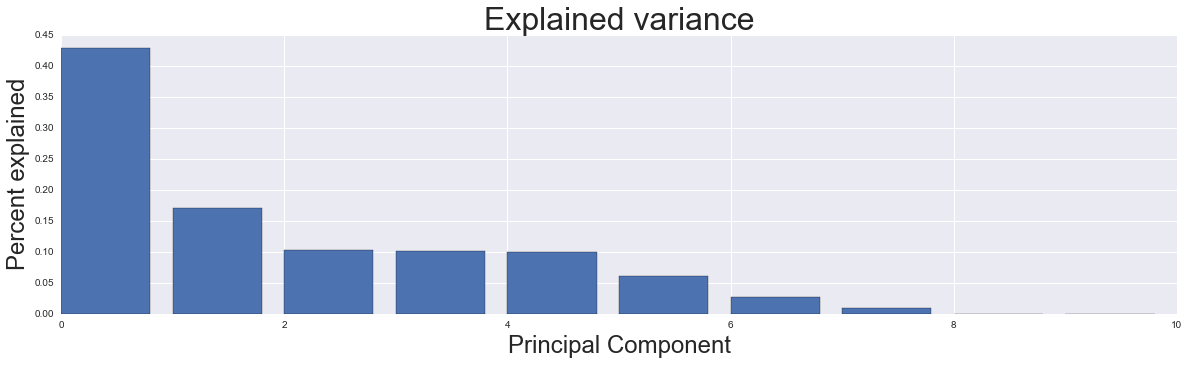

In [209]:
# Generate a figure with figsize=(20,5)
fig = plt.figure(figsize=(20,5))
# Generate axes via add_subplot
ax = fig.add_subplot(1,1,1)
# Call ax.bar on the appropriate x and y to generate a bar graph of the explained variance for each component
# x should be the numbers 1 to 64
# y should be pca.explained_variance_ratio_
ax.bar([x for x in range(len(pca.explained_variance_ratio_))],pca.explained_variance_ratio_)
#ax.plot([x for x in range(len(pca.explained_variance_ratio_))],np.cumsum(pca.explained_variance_ratio_))

ax.set_title("Explained variance", size=32)
ax.set_ylabel("Percent explained", size=24)
ax.set_xlabel("Principal Component", size=24);

In [210]:
# Create PCA-generator
pca = PCA(n_components=4)
# Transform X_centered to X_pca via a fit_transform
X_pca = pca.fit_transform(X_centered)

In [211]:
for x in xrange(1,11):
    # Create PCA-generator
    pca = PCA(n_components=x)
    # Transform X_centered to X_pca via a fit_transform
    X_pca = pca.fit_transform(X_centered)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print "LR with ", x , " Components (PCA) : ",  lr.score(X_test, y_test)

LR with  1  Components (PCA) :  0.00869482695529
LR with  2  Components (PCA) :  0.0215742406061
LR with  3  Components (PCA) :  0.0450125579432
LR with  4  Components (PCA) :  0.0467217563346
LR with  5  Components (PCA) :  0.0566309006573
LR with  6  Components (PCA) :  0.0741500982672
LR with  7  Components (PCA) :  0.0611920531818
LR with  8  Components (PCA) :  0.0996682126599
LR with  9  Components (PCA) :  0.11857076216
LR with  10  Components (PCA) :  0.160011178604


#Conclusions: PCA didn't make a difference, in fact made it worse

####LR with  1  Components (PCA) :  0.0103441500479
####LR with  2  Components (PCA) :  0.0231075906267
####LR with  3  Components (PCA) :  0.0543909105094
####LR with  4  Components (PCA) :  0.0539229381014
####LR with  5  Components (PCA) :  0.0603740290585
####LR with  6  Components (PCA) :  0.0640345033193
####LR with  7  Components (PCA) :  0.0822623454032
####LR with  8  Components (PCA) :  0.0834461029102
####LR with  9  Components (PCA) :  0.106103047382
####LR with  10  Components (PCA) :  0.169086871747

#Challenges and Successes

###Challenges
My data set was really small and I didn't have a lot of features. 
I did not have that many challenges trying out the different models. In fact, perhaps the most difficult part of my project was during the cleaning part. I thought I had created some good functions for cleaning 30k rows of data, but my functions (using one too many for loops) took a very long time to run, which was discouraging to say the least.

###Successess
I was really happy with how many different regression models I tried. I feel like I learned a lot from using all of the different models, despite not getting a very good score.

#Possible Extensions or business applications
So right now, this model (40% accuracy) is not ready for the business world unfortunately. However, I think it is a step in the right direction.

This could be a tool that people use to predict when their audiences are becoming saturated or when facebook is adjusting their impressions system. Or if and when competitors are targeting similar audiences. 

#Conclusions and key learnings

####In conclusion, LR regression with a poly regression of 4 the best with my data to produce a 43% accurate model. 

####Here are my key learnings:
######1) I needed more features
######2) I needed more data in general; 31k rows of data was not enough
######3) I should have used get dummies with the day of week feature. Or made a weekend vs weekday.
######4) I needed more features that weren't correlated. All of the "Historic X" features were all correlated.
######5) When you have a small set of data, having a larger train size produces better results
######6) There are a ton of different types of regression models.
######7) It would be nice to have a running list of all the scores from all the different models you ran, a dictionary of scores would be nice
######8) I should have spent more time doing data visualization from the beginning, despite being relatively familiar with the data, having looked at it in excel.
######9) Day of year probably would have been better off as the month and then also could have used get dummies on that. 

In [212]:
df_norm.columns

Index([u'Impressions', u'DayofYear', u'DayofWeek', u'BidType:_ABSOLUTE_OCPM',
       u'BidType:_CPA', u'BidType:_CPC', u'AdSetAge', u'HistoricReach',
       u'HistoricImpressions', u'HistoricSpend', u'Budget'],
      dtype='object')

##Data Dictionary
###Impressions: The number of impressions the ad had per day. An impression is when an ad is shown to a someone. 
###Day of year: the day of the year, listed 1 through 365
###Day of the Week: listed 0 through 6, 0 being sunday
###Bid Type Absolute OCPM: Bidding on a pixel conversion metric
###Bid Type CPA: Cost per Facebook action, such as a like
###Bid Type CPC: Cost per Click
###Historic Reach: The total number of "Reach" (amount of individual users) the adset had previous to the day of ad run
###Historic Impressions: The sum of impressions the adset had had previously
###Historic Spend: The total amount the adset had spend previously
###Budget: The daily budget for the day in question